# Customer churn prediction

In [124]:
import warnings
warnings.filterwarnings("ignore")

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

### Import Data

In [126]:
df = pd.read_csv("Customer.csv")

In [127]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing

In [128]:
df.shape

(7043, 21)

In [129]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [130]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [131]:
# Dropping the Unnecessary columns
imp_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract', 'TotalCharges', 'Churn']
df = df[imp_columns]

In [132]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,Month-to-month,29.85,No
1,Male,0,No,No,34,Yes,No,One year,1889.5,No
2,Male,0,No,No,2,Yes,No,Month-to-month,108.15,Yes
3,Male,0,No,No,45,No,No phone service,One year,1840.75,No
4,Female,0,No,No,2,Yes,No,Month-to-month,151.65,Yes


In [133]:
# Encoding the variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Columns to encode
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract', 'Churn']

# encoding to each column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [134]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,29.85,0
1,1,0,0,0,34,1,0,1,1889.5,0
2,1,0,0,0,2,1,0,0,108.15,1
3,1,0,0,0,45,0,1,1,1840.75,0
4,0,0,0,0,2,1,0,0,151.65,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   int64 
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   int64 
 3   Dependents     7043 non-null   int64 
 4   tenure         7043 non-null   int64 
 5   PhoneService   7043 non-null   int64 
 6   MultipleLines  7043 non-null   int64 
 7   Contract       7043 non-null   int64 
 8   TotalCharges   7043 non-null   object
 9   Churn          7043 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.4+ KB


In [136]:
# Convert 'TotalCharges' column to float, and handle errors='coerce' to replace non-numeric values with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [137]:
df.isnull().sum()

gender            0
SeniorCitizen     0
Partner           0
Dependents        0
tenure            0
PhoneService      0
MultipleLines     0
Contract          0
TotalCharges     11
Churn             0
dtype: int64

In [138]:
# Replace missing values in the 'TotalCharges' column with the mean of the column
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [139]:
df.isnull().sum()

gender           0
SeniorCitizen    0
Partner          0
Dependents       0
tenure           0
PhoneService     0
MultipleLines    0
Contract         0
TotalCharges     0
Churn            0
dtype: int64

In [140]:
print("Stastistics of Total Charges: ")
print(X['TotalCharges'].describe())

Stastistics of Total Charges: 
count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


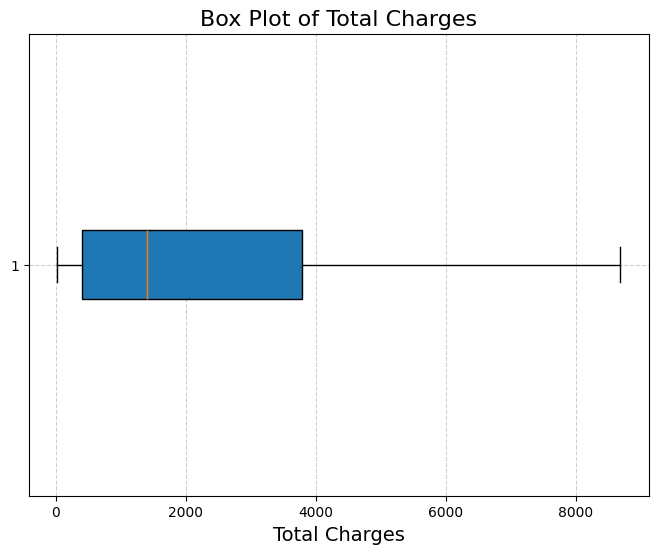

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
# Replace this with your actual data loading
data = df['TotalCharges']

# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['TotalCharges'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Total Charges', fontsize=16)
plt.xlabel('Total Charges', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [142]:
# Split the data
X = df.drop('Churn', axis=1)
y = df['Churn']

In [143]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Standardize the fatures using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Import the Model

In [145]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with detailed parameters
rf = RandomForestClassifier(
    n_estimators=200,        
    max_depth=10,            
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    random_state=42        
)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

In [146]:
# Print predictions
print(y_pred)

[1 0 0 ... 0 0 0]


## Performance

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7799858055358411

In [148]:
# Save the Model
import pickle
pickle.dump(rf,open("churn.pkl",'wb'))

# Classification System

In [149]:
def prediction(gender,Seniorcitizen,Partner,Dependents,tenure,Phoneservice,multiline,contact,totalcharge):
    data = {
    'gender': [gender],
    'SeniorCitizen': [Dependents],
    'Partner': [Partner],
    'Dependents': [Phoneservice],
    'tenure': [tenure],
    'PhoneService': [Phoneservice],
    'MultipleLines': [multiline],
    'Contract': [contact],
    'TotalCharges': [totalcharge]
    }
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)


    # Encode the categorical columns
    categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract']
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    df = scaler.fit_transform(df)

    result = rf.predict(df).reshape(1,-1)
    return result[0]

In [150]:
gender = "Female"
Seniorcitizen = "No"
Partner = "Yes"
Dependents = "No"
tenure = 1
Phoneservice="No"
multiline = "No phone service"
contact="Month-to-month"
totalcharge = 29.85
result = prediction(gender,Seniorcitizen,Partner,Dependents,tenure,Phoneservice,multiline,contact,totalcharge)

if result==1:
    print('churn')
else:
    print('not churn')

not churn
